In [1]:
import numpy as np
import xarray as xr
import geopandas as gpd
import pandas as pd
from osgeo import gdal, ogr
import os

In [2]:
x = range(1987,2019,1)
years = []
for i in x:
    nextyear = str(i + 1)[2:]
    y = str(i) + "_" + nextyear
    years.append(str(y))

In [3]:
# removing years that didnt work
years =  [e for e in years if e not in ('1988_89', '1991_92', '1993_94', '2015_16', '2011_12', '2012_13')]
years.sort()

In [4]:
directory = "/g/data/r78/cb3058/dea-notebooks/ICE_project/results/nmdb_test/"

In [5]:
folders = os.listdir(directory)
folders.sort()

area_a = []
area_b = []

for year, folder in zip(years, folders): 
    #progress indicator
    print("\r", "working on year: " + year, end = '')
    def getIrrigatedArea(shp):
        irr = gpd.read_file(shp)
        a = irr[irr.DN==80]
        b = irr[(irr.DN==80) | (irr.DN==75)]
        area_a.append(a.area.sum() / 10000)
        area_b.append(b.area.sum() / 10000)

    getIrrigatedArea(directory+folder+"/"+"nmdb_Summer"+ year + "_Irrigated.shp")


 working on year: 2018_19

In [6]:
years_dt = []
for i in years:
    x = int(i[:-3])
    years_dt.append(x)

df = pd.DataFrame.from_dict({'year':years_dt, '0.8':area_a, '0.75+0.8':area_b})
df = df.set_index('year')

Text(0, 0.5, 'Area under Irrigation (Ha)')

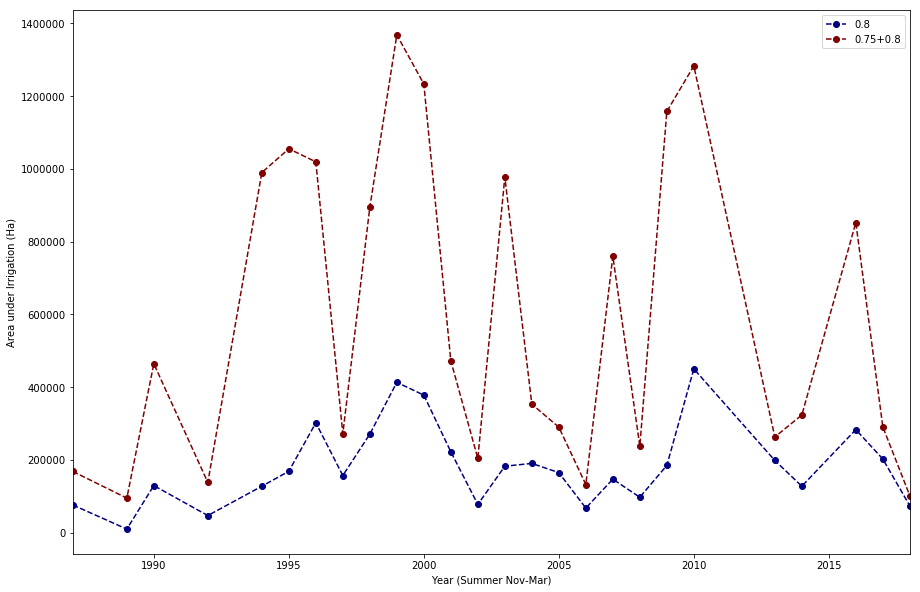

In [10]:
ax = df.plot(colormap='jet', linestyle='--', marker='o', figsize=(15,10))
ax.set_xlabel('Year (Summer Nov-Mar)')
ax.set_ylabel('Area under Irrigation (Ha)')
